In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# import rcParams and set the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

# import KMeans from sklearn
from sklearn.cluster import KMeans

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read the data
df_customer = pd.read_csv("mall_customers.csv")

# print first five rows of data
df_customer.head()

,CustomerID,Genre,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# check the shape of the data
df_customer.shape

(200, 5)

In [4]:
# check the data types of the variables
df_customer.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income              int64
Spending Score (1-100)     int64
dtype: object

In [5]:
# check for missing values
df_customer.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income             0
Spending Score (1-100)    0
dtype: int64

In [6]:
# drop unwanted column
df_customer.drop(['CustomerID'], axis=1, inplace=True)

In [7]:
# filter the numerical variables
df_num = df_customer.select_dtypes(include=np.number)

# print the first three rows of the data
df_num.head(3)

,Age,Annual Income,Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6


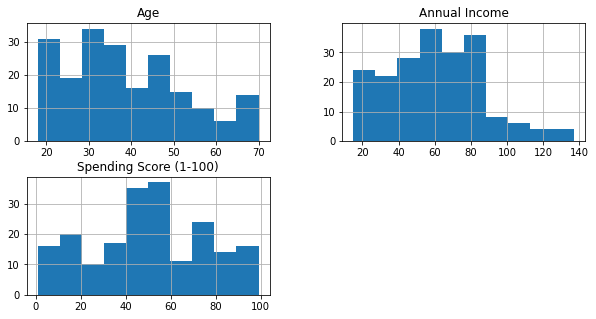

In [8]:
# create a histogram for numerical variables
df_num.hist()
# diaplay the plot
plt.show()

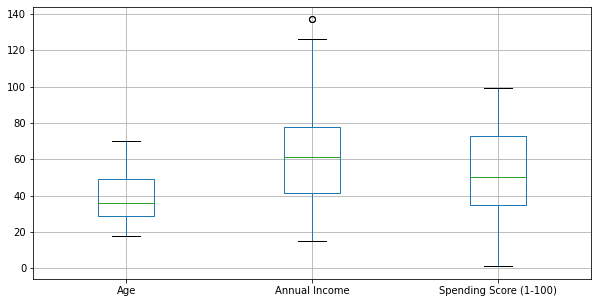

In [9]:
# create a boxplot for numeric variables
df_num.boxplot()

**Gender distribution**

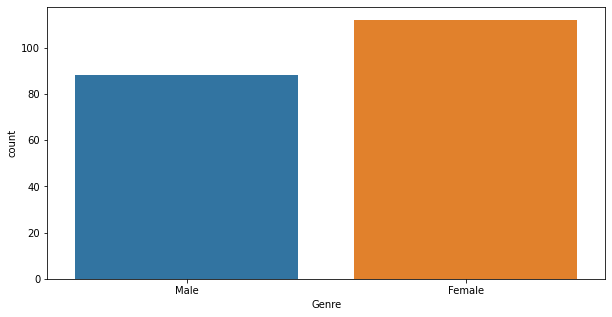

In [10]:
# create a countplot
sns.countplot(x='Genre', data=df_customer)
# display the plot
plt.show()

**Average anual income by gender**

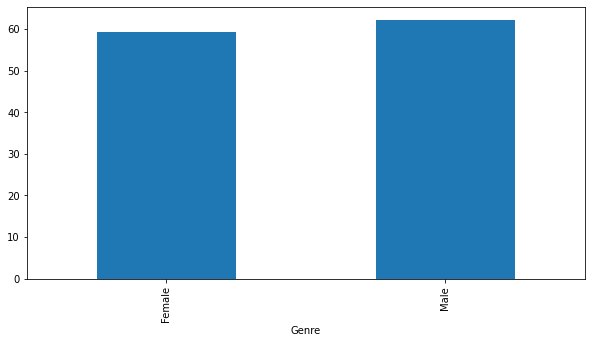

In [11]:
# create a barplot
df_customer.groupby('Genre')['Annual Income'].mean().plot(kind='bar')
# display the plot
plt.show()

**Average spending score by gender**

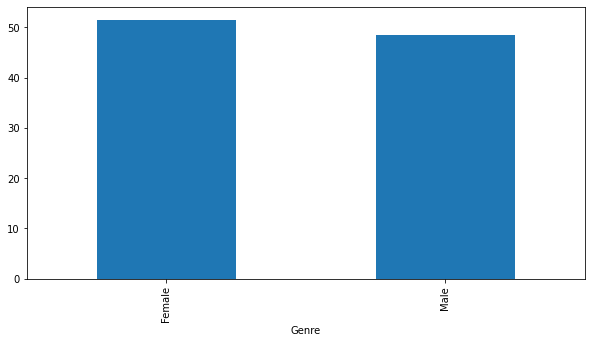

In [12]:
# create the barplot
df_customer.groupby('Genre')['Spending Score (1-100)'].mean().plot(kind='bar')
# display the plot
plt.show()

**Total spending score by gender**

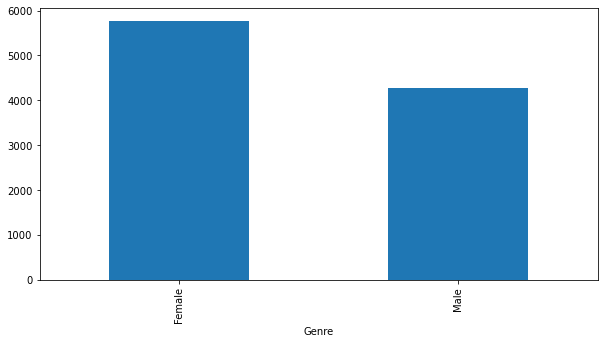

In [13]:
# create the barplot
df_customer.groupby('Genre')['Spending Score (1-100)'].sum().plot(kind='bar')
# display the plot
plt.show()

Text(0.5, 1.0, 'Histogram for Spending Score')

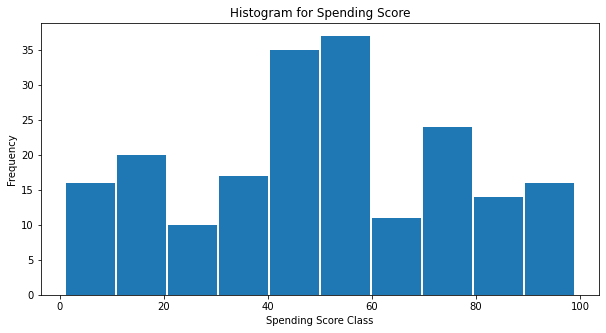

In [14]:
#my_bins=10
# Histogram used by deafult 10 bins
arr=plt.hist(df_customer['Spending Score (1-100)'],bins=10, rwidth=0.95) 
# set label for x-axis
plt.xlabel('Spending Score Class')
# set label for y-axis
plt.ylabel('Frequency')
# set title of the graph
plt.title('Histogram for Spending Score')

### Model Building

**Customer segmentation using Annual Income and Spending Score**

In [15]:
# consider the variables
X = df_customer[['Annual Income', 'Spending Score (1-100)']]

In [16]:
# create empty dictionary
sse = {}
for k in range(1, 11): # select the range for k 
    kmeans = KMeans(n_clusters=k, random_state=42) # build the model
    kmeans.fit(X) # fit the model
    sse[k] = kmeans.inertia_ 

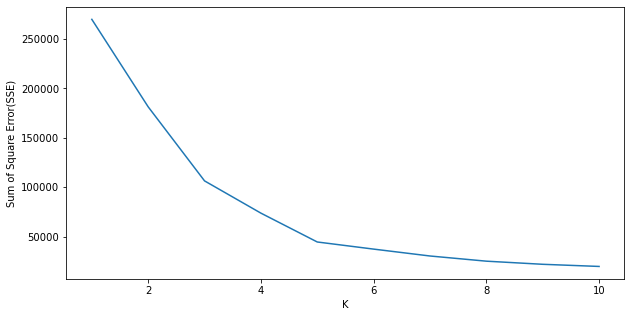

In [17]:
# set the label for x-axis
plt.xlabel('K')
# set the label for y-axis
plt.ylabel('Sum of Square Error(SSE)')
# plot the sse for different k values
plt.plot(list(sse.keys()), list(sse.values()))

In [18]:
# build model for k=5
model = KMeans(n_clusters=5, random_state=42)
# fit the model
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [19]:
# predict the values
y_predicted = model.fit_predict(X)

In [20]:
# add the new column to the dataframe
df_customer['cluster'] = y_predicted
# display the dataframe
df_customer.head()

,Genre,Age,Annual Income,Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


In [21]:
# check the number of clusters
df_customer['cluster'].unique()

array([2, 3, 0, 4, 1])

In [22]:
# get all the values
X = X.values

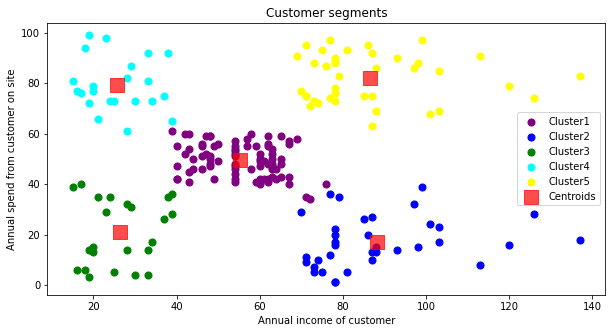

In [23]:
# Visualizing the clusters for k=5
plt.scatter(X[y_predicted==0,0],X[y_predicted==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_predicted==1,0],X[y_predicted==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_predicted==2,0],X[y_predicted==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_predicted==3,0],X[y_predicted==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_predicted==4,0],X[y_predicted==4,1],s=50, c='yellow',label='Cluster5')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()



In [24]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

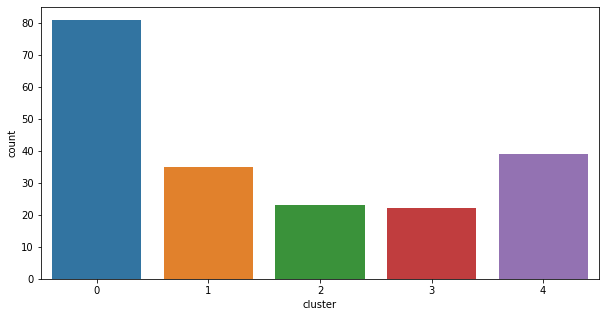

In [25]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df_customer, x = 'cluster')
         

# add values in the graph
#plt.text(x = -0.15, y =6, s = np.unique(model.labels_, return_counts=True)[1][0])
#plt.text(x = 0.8, y =9, s = np.unique(model.labels_, return_counts=True)[1][1])
#plt.text(x = 1.9, y =5, s = np.unique(model.labels_, return_counts=True)[1][2])

#plt.show()

In [26]:
# check the data type of the 'cluster'
df_customer['cluster'].dtypes

dtype('int32')

In [27]:
# change the data type
df_customer = df_customer['cluster'].astype(object)

In [28]:
# serializing our model to a file called model.pkl
import pickle
pickle.dump(model, open("model.pkl","wb"))